<a href="https://colab.research.google.com/github/CodeByD3v/ml-projects/blob/main/Image%20Classification/Fashion%20Mnist%20Classifier/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Mnist



> **Citation** : Zalando Research - Fashion MNIST dataset


> Dataset : https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=train-labels-idx1-ubyte




In [129]:
# Importing Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [130]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zalando_research_fashionmnist_path = kagglehub.dataset_download('zalando-research/fashionmnist')

print('Data source import complete.')


Data source import complete.


In [131]:
# Directory & files
import os

# train_df = zalando_research_fashionmnist_path

for dirname , _ , filenames in os.walk(zalando_research_fashionmnist_path):
  for filename in filenames :
    print(os.path.join(dirname , filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [132]:
# Loading Dataset
# train dataset
train_df = pd.read_csv(f"{zalando_research_fashionmnist_path}/fashion-mnist_train.csv")

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
train_df.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [134]:
# test dataset
test_df = pd.read_csv(f"{zalando_research_fashionmnist_path}/fashion-mnist_test.csv")

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


### Label

---

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot








In [136]:
# Label Data
label_data = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag" , "Ankle boot"]

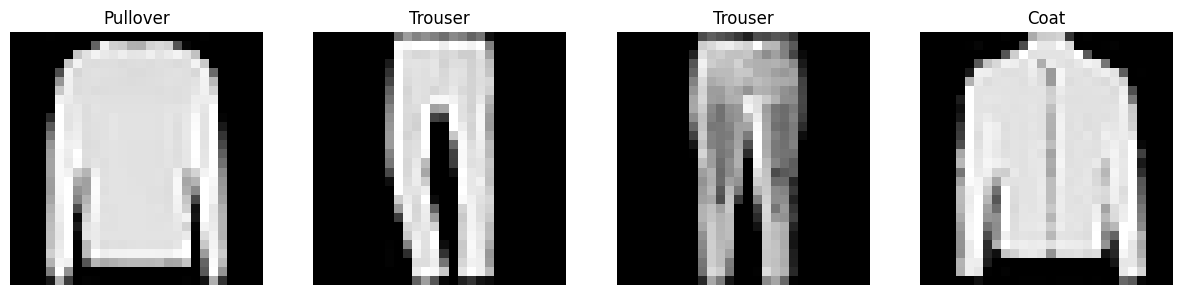

In [137]:
# preview data
preview = train_df.drop("label" , axis = 1)

plt.figure(figsize = (15 ,10))
for i in range(1 ,5):
  random_label = random.randint( 0 ,len(train_df)-1)
  image = np.array(preview.iloc[random_label , :]).reshape(28 , 28)

  plt.subplot(1 , 4 , i)
  plt.imshow(image , cmap = "gray")
  plt.title(label_data[train_df.iloc[random_label , 0]])
  plt.axis("off")
plt.show()

In [138]:
# Train , Validation , Test
train_data , valid_data = np.split(train_df.sample(frac = 1) , [int(0.8 * len(train_df))])

# Train
X_train , y_train = train_data.drop("label" , axis = 1).reset_index(drop = True) , train_data["label"].reset_index(drop = True)

# Valid
X_valid , y_valid = valid_data.drop("label" , axis = 1).reset_index(drop = True) , valid_data["label"].reset_index(drop = True)

# Test
X_test , y_test = test_df.drop("label" , axis = 1).reset_index(drop = True) , test_df["label"].reset_index(drop = True)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [139]:
# Model
model = keras.models.Sequential([
    keras.layers.Dense(units = 128 , input_shape = (784,) , activation = "relu"),
    keras.layers.Dense(units = 64 , activation = "relu"),
    keras.layers.Dense(units = 10  , activation = "softmax")
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Compile

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) ,
              loss = keras.losses.sparse_categorical_crossentropy ,
              metrics = ["accuracy"]
              )


In [141]:
# Model Training
history = model.fit(X_train , y_train , epochs = 10 , batch_size = 64 , validation_data = (X_valid , y_valid))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6820 - loss: 9.4865 - val_accuracy: 0.7298 - val_loss: 1.0381
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7733 - loss: 0.8338 - val_accuracy: 0.7868 - val_loss: 0.6977
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8113 - loss: 0.5854 - val_accuracy: 0.8198 - val_loss: 0.5623
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8246 - loss: 0.5202 - val_accuracy: 0.8242 - val_loss: 0.5071
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8309 - loss: 0.4746 - val_accuracy: 0.8235 - val_loss: 0.5092
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8481 - loss: 0.4333 - val_accuracy: 0.8129 - val_loss: 0.5118
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8497 - loss: 0.4067 - val_accuracy: 0.8307 - val_loss: 0.4716
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8480 - loss: 0.4178 - val_accuracy: 0.

In [142]:
# Model evaluation
loss , accuracy  = model.evaluate(X_test , y_test , verbose = 0)

print("Accuracy : " , accuracy )
print("Loss : " , loss )

Accuracy :  0.8589000105857849
Loss :  0.3993988633155823


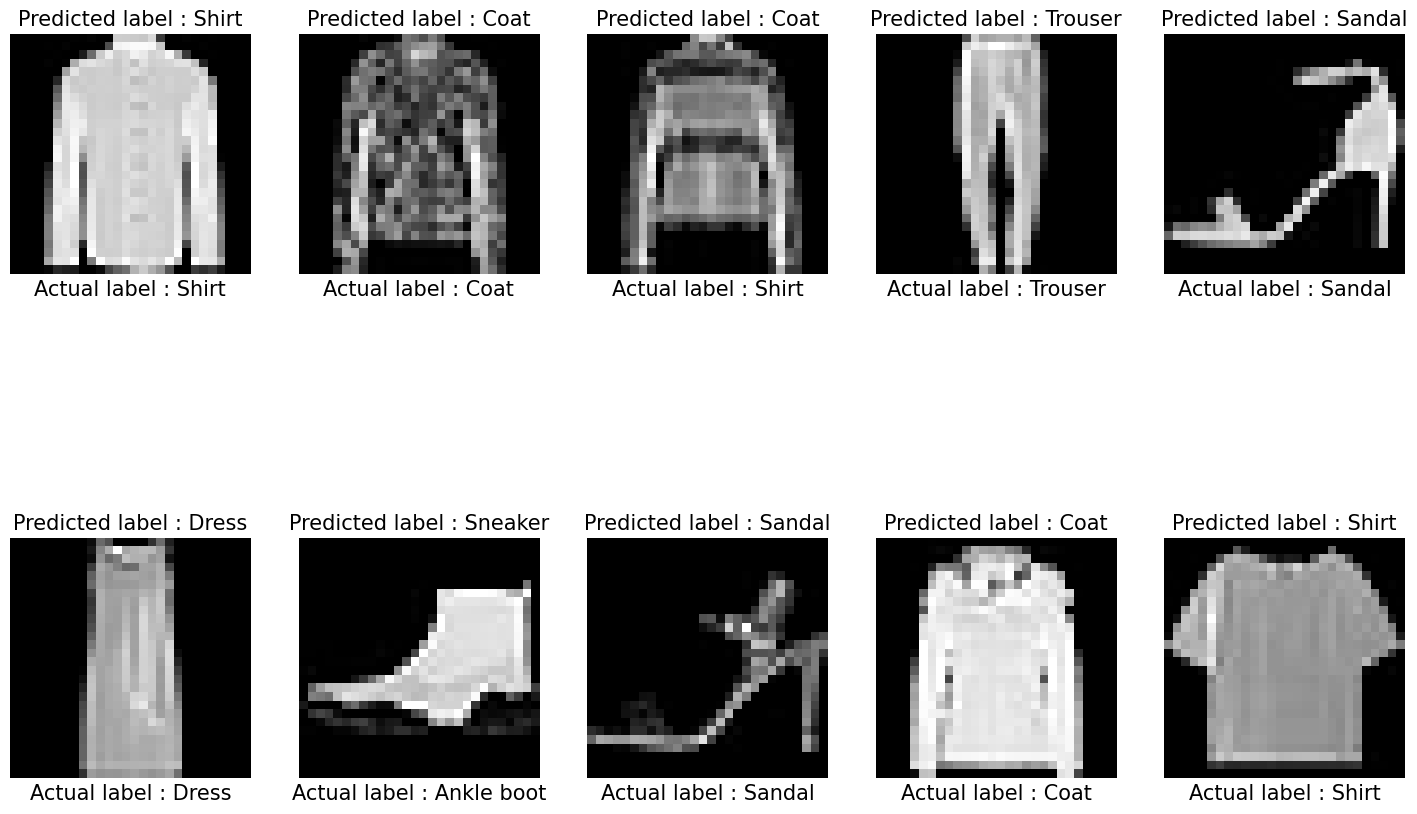

In [143]:
# Prediction
plt.figure(figsize = (18 , 12))
for i in range(1 , 11):
  rand_idx = random.randint(0 , len(test_df)) # random index
  y_pred_prob = model.predict(X_test.iloc[[rand_idx]] , verbose = 0 ) # prediction
  y_pred_label = np.argmax(y_pred_prob) # predicted label
  y_actual_label = y_test[[rand_idx]].values[0] # actual y -- label

  plt.subplot(2 , 5 , i)
  image = np.array(X_test.iloc[rand_idx , :]).reshape(28 , 28)
  plt.imshow(image , cmap = "gray")
  plt.title(f"Predicted label : {label_data[y_pred_label]}" , size = "15")
  plt.xlabel(f"Actual label : {label_data[y_actual_label]}" , size = "15")

  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.gca().spines['bottom'].set_visible(False)
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

plt.show()